# Programming Assignment - 9
---
## Name: Samruth Vennapusala
---

In [174]:
# Import required packages
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
pd.reset_option("^display")

## Question 1
---
Set up a linear regression model for the miles per gallon on the data at automobile [UCI](https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/).  Discard the categorical data.

>1. Get feature matrix X, and target variable y.
>1. Split data into training and testing.
>1. Normalize data using MinMaxScaler.
>1. Creat a LinearRegression object for modeling.
>1. Train the model with training data.
>1. Look at R^2 score for the goodness of fit for the train and test data.
>1. Present a graphical comparison of true and observed responses for the test data.

In [42]:
data_path = r"C:/Users/samru/Desktop/auto_data.csv"
test_data = pd.io.parsers.read_csv(data_path, names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name'],engine='python', delimiter=',')
test_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
401,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
402,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
403,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
404,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [55]:
quant_data = test_data.drop(columns=['origin', 'car_name'])
quant_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
401,27.0,4,140.0,86.0,2790,15.6,82
402,44.0,4,97.0,52.0,2130,24.6,82
403,32.0,4,135.0,84.0,2295,11.6,82
404,28.0,4,120.0,79.0,2625,18.6,82


In [56]:
quant_data.dropna(subset = ["mpg"], inplace=True)
quant_data.dropna(subset = ["horsepower"], inplace=True)

In [57]:
X = quant_data.drop(columns=['mpg'])
y = quant_data.mpg.values

In [58]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=100)

In [59]:
scaler = MinMaxScaler()
normalized_X_train = scaler.fit_transform(X_train)
normalized_X_test = scaler.fit_transform(X_test)

In [60]:
regr = linear_model.LinearRegression()

In [61]:
regr.fit(normalized_X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
y_pred = regr.predict(normalized_X_test)

In [63]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [ -0.51618528   1.97460023  -1.55689687 -22.41365715   1.33402168
   9.29331071]


In [64]:
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination(R^2): %.2f'
      % r2_score(y_test, y_pred))

Mean squared error: 12.93
Coefficient of determination(R^2): 0.74


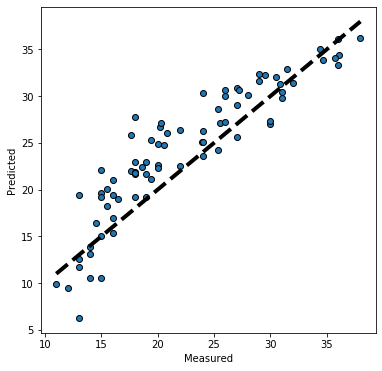

In [65]:
fig, ax = plt.subplots()
fig.set_size_inches(6,6)
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## Question 2
---
Setup a logistic regression model on the data at [adultUCI](http://archive.ics.uci.edu/ml/datasets/Adult).  Discuss the performance of your model using appropriate statistics. Use dummy variables to handle categorical variables. 

1. Prepare the data. Create dummy variables for categorical variables. [See this](https://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example)
2. Get feature matrix X, and target variable y (>50k or <50k)
3. Split data into training and testing
4. Normalize data using MinMaxScaler
5. Creat a LogisticRegression object for modeling
6. Train the model with training data
7. Compare the precision, recall, and F1-score on the train and test data.

In [168]:
# Your code comes here
data_path = r"C:/Users/samru/Desktop/adult.data"
test_data = pd.io.parsers.read_csv(data_path, names=['age', 'workclass','fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain','capital_loss','hour_per_week','native_country',"prediction"],engine='python', delimiter=',')
test_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hour_per_week,native_country,prediction
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [169]:
pd.get_dummies(test_data['workclass'])
df_dummies = pd.get_dummies(test_data, prefix='workclass', prefix_sep='.', 
                            columns=['workclass'])
pd.get_dummies(test_data['education'])
df_dummies = pd.get_dummies(df_dummies, prefix='education', prefix_sep='.', 
                            columns=['education'])
pd.get_dummies(test_data['marital_status'])
df_dummies = pd.get_dummies(df_dummies, prefix='marital_status', prefix_sep='.', 
                            columns=['marital_status'])
pd.get_dummies(test_data['occupation'])
df_dummies = pd.get_dummies(df_dummies, prefix='occupation', prefix_sep='.', 
                            columns=['occupation'])
pd.get_dummies(test_data['relationship'])
df_dummies = pd.get_dummies(df_dummies, prefix='relationship', prefix_sep='.', 
                            columns=['relationship'])
pd.get_dummies(test_data['race'])
df_dummies = pd.get_dummies(df_dummies, prefix='race', prefix_sep='.', 
                            columns=['race'])
pd.get_dummies(test_data['sex'])
df_dummies = pd.get_dummies(df_dummies, prefix='sex', prefix_sep='.', 
                            columns=['sex'])
pd.get_dummies(test_data['native_country'])
df_dummies = pd.get_dummies(df_dummies, prefix='native_country', prefix_sep='.', 
                            columns=['native_country'])

pd.get_dummies(test_data['prediction'])

df_dummies = pd.get_dummies(df_dummies, prefix='prediction', prefix_sep='.', 
                            columns=['prediction'])

df_dummies.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hour_per_week,workclass. ?,workclass. Federal-gov,workclass. Local-gov,workclass. Never-worked,...,native_country. Scotland,native_country. South,native_country. Taiwan,native_country. Thailand,native_country. Trinadad&Tobago,native_country. United-States,native_country. Vietnam,native_country. Yugoslavia,prediction. <=50K,prediction. >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [170]:
df_dummies=df_dummies.rename(columns={'prediction. <=50K' : 'prediction_less_50k'})
df_dummies=df_dummies.drop(columns=['prediction. >50K'])
df_dummies.head()


,age,fnlwgt,education_num,capital_gain,capital_loss,hour_per_week,workclass. ?,workclass. Federal-gov,workclass. Local-gov,workclass. Never-worked,...,native_country. Puerto-Rico,native_country. Scotland,native_country. South,native_country. Taiwan,native_country. Thailand,native_country. Trinadad&Tobago,native_country. United-States,native_country. Vietnam,native_country. Yugoslavia,prediction_less_50k
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [171]:
X = df_dummies.drop(columns=['prediction_less_50k'])
y = df_dummies.prediction_less_50k.values

In [172]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=100)

In [173]:
scaler = MinMaxScaler()
normalized_X_train = scaler.fit_transform(X_train)
normalized_X_test = scaler.fit_transform(X_test)

In [178]:
logreg = LogisticRegression(C=1000, tol=0.0001, max_iter=2000)

In [179]:
logreg.fit(normalized_X_train, y_train)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [181]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, logreg.predict(normalized_X_test)))
print(classification_report(y_test, logreg.predict(normalized_X_test)))

[[ 991  614]
 [ 340 4568]]
              precision    recall  f1-score   support

           0       0.74      0.62      0.68      1605
           1       0.88      0.93      0.91      4908

    accuracy                           0.85      6513
   macro avg       0.81      0.77      0.79      6513
weighted avg       0.85      0.85      0.85      6513

